# Caste Based Hate Crime Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('crime_by_district.csv')

In [4]:
df.head(5)

,STATE/UT,DISTRICT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7


In [5]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Assault on women',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'],
      dtype='object')

In [6]:
df.describe(include = 'all')

,STATE/UT,DISTRICT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
count,9841,9841,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000
unique,70,832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,UTTAR PRADESH,TOTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,878,456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2007.161671,1.742912,3.656437,1.078142,0.089422,0.206280,0.590590,10.985875,28.155472,0.880398,35.868001
std,NaN,NaN,3.755454,11.887530,19.543118,8.343824,0.716764,1.466608,3.697031,52.538202,160.208471,8.553610,209.896023
min,NaN,NaN,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000
75%,NaN,NaN,2010.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,5.000000,15.000000,0.000000,20.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   STATE/UT                              9841 non-null   object
 1   DISTRICT                              9841 non-null   object
 2   Year                                  9841 non-null   int64 
 3   Murder                                9841 non-null   int64 
 4   Assault on women                      9841 non-null   int64 
 5   Kidnapping and Abduction              9841 non-null   int64 
 6   Dacoity                               9841 non-null   int64 
 7   Robbery                               9841 non-null   int64 
 8   Arson                                 9841 non-null   int64 
 9   Hurt                                  9841 non-null   int64 
 10  Prevention of atrocities (POA) Act    9841 non-null   int64 
 11  Protection of Civil Rights (PC

In [8]:
df.duplicated().sum()

np.int64(2)

In [9]:
duplicate_rows = df[df.duplicated]
duplicate_rows

,STATE/UT,DISTRICT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
205,JAMMU & KASHMIR,ANANTNAG,2001,0,0,0,0,0,0,0,0,0,0
3344,NAGALAND,TOTAL,2005,0,0,0,0,0,0,0,0,0,0


In [10]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [11]:
df.nunique()

STATE/UT                                 70
DISTRICT                                832
Year                                     13
Murder                                   81
Assault on women                        118
Kidnapping and Abduction                 60
Dacoity                                  16
Robbery                                  24
Arson                                    50
Hurt                                    245
Prevention of atrocities (POA) Act      326
Protection of Civil Rights (PCR) Act     75
Other Crimes Against SCs                391
dtype: int64

In [123]:
df.columns = map(str.lower, df.columns)

In [124]:
df.columns

Index(['state/ut', 'district', 'year', 'murder', 'assault on women',
       'kidnapping and abduction', 'dacoity', 'robbery', 'arson', 'hurt',
       'prevention of atrocities (poa) act',
       'protection of civil rights (pcr) act', 'other crimes against scs'],
      dtype='object')

In [125]:
df = df.map(lambda x: x.lower() if isinstance(x, str) else x)
df['state/ut'].unique()

array(['andhra pradesh', 'arunachal pradesh', 'assam', 'bihar',
       'chhattisgarh', 'goa', 'gujarat', 'haryana', 'himachal pradesh',
       'jammu & kashmir', 'jharkhand', 'karnataka', 'kerala',
       'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'odisha', 'punjab', 'rajasthan', 'sikkim',
       'tamil nadu', 'tripura', 'uttar pradesh', 'uttarakhand',
       'west bengal', 'a & n islands', 'chandigarh', 'd & n haveli',
       'daman & diu', 'delhi', 'lakshadweep', 'puducherry', 'a&n islands',
       'd&n haveli', 'delhi ut'], dtype=object)

In [126]:
df['state/ut'].nunique()

38

In [127]:
df.loc[df['state/ut'] == 'a & n islands', 'state/ut'] = 'a&n islands'
df.loc[df['state/ut'] == 'd & n haveli', 'state/ut'] = 'd&n haveli'
df.loc[df['state/ut'] == 'delhi ut', 'state/ut'] = 'delhi'

In [128]:
df['state/ut'].unique()

array(['andhra pradesh', 'arunachal pradesh', 'assam', 'bihar',
       'chhattisgarh', 'goa', 'gujarat', 'haryana', 'himachal pradesh',
       'jammu & kashmir', 'jharkhand', 'karnataka', 'kerala',
       'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'odisha', 'punjab', 'rajasthan', 'sikkim',
       'tamil nadu', 'tripura', 'uttar pradesh', 'uttarakhand',
       'west bengal', 'a&n islands', 'chandigarh', 'd&n haveli',
       'daman & diu', 'delhi', 'lakshadweep', 'puducherry'], dtype=object)

In [129]:
df['state/ut'].nunique()

35

In [130]:
df.columns

Index(['state/ut', 'district', 'year', 'murder', 'assault on women',
       'kidnapping and abduction', 'dacoity', 'robbery', 'arson', 'hurt',
       'prevention of atrocities (poa) act',
       'protection of civil rights (pcr) act', 'other crimes against scs'],
      dtype='object')

In [131]:
df['total_atrocities'] =  df['murder']+df['assault on women']+df['kidnapping and abduction']+df['dacoity']+df['robbery']+df['arson']+df['hurt']+df['prevention of atrocities (poa) act']+df['protection of civil rights (pcr) act']+df['other crimes against scs']
df.head()

,state/ut,district,year,murder,assault on women,kidnapping and abduction,dacoity,robbery,arson,hurt,prevention of atrocities (poa) act,protection of civil rights (pcr) act,other crimes against scs,total_atrocities
0,andhra pradesh,adilabad,2001,0,1,4,0,0,0,3,0,15,32,55
1,andhra pradesh,anantapur,2001,0,4,0,0,0,0,49,21,0,53,127
2,andhra pradesh,chittoor,2001,3,3,0,0,0,0,38,36,0,34,114
3,andhra pradesh,cuddapah,2001,0,3,0,0,0,0,20,52,0,25,100
4,andhra pradesh,east godavari,2001,1,3,0,0,0,0,3,12,63,7,89


In [132]:
cols = ['murder', 'assault on women', 'kidnapping and abduction', 
        'dacoity', 'robbery', 'arson', 'hurt', 'prevention of atrocities (poa) act',
       'protection of civil rights (pcr) act', 'other crimes against scs']

total_crimes = df[cols].sum().reset_index()
total_crimes.columns = ['atrocities', 'total_crimes']
total_crimes

,atrocities,total_crimes
0,murder,17152
1,assault on women,35983
2,kidnapping and abduction,10610
3,dacoity,880
4,robbery,2030
5,arson,5812
6,hurt,108112
7,prevention of atrocities (poa) act,277078
8,protection of civil rights (pcr) act,8664
9,other crimes against scs,352977


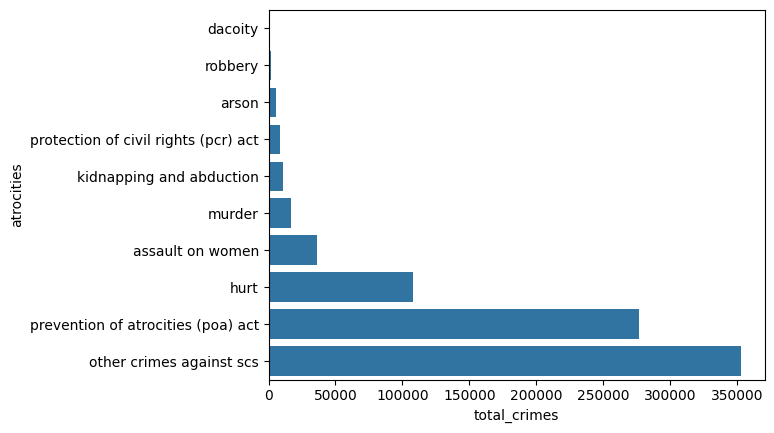

In [133]:
sns.barplot(data=total_crimes.sort_values(by='total_crimes'), y='atrocities', x='total_crimes')
plt.show()

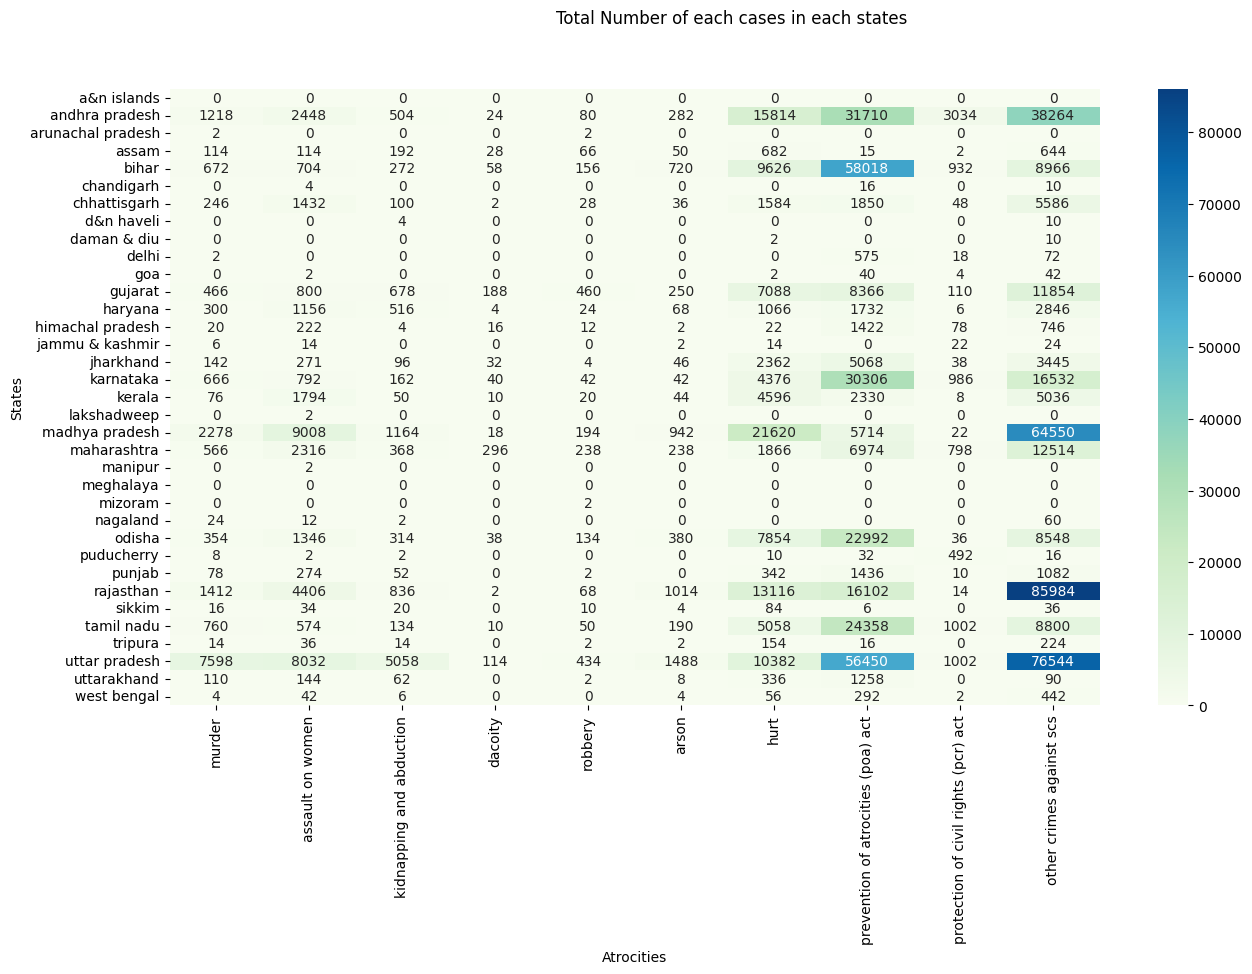

In [134]:
plt.figure(figsize=(15, 8))
totalcrimesbystate = df.groupby('state/ut')[cols].sum()
sns.heatmap(totalcrimesbystate, annot=True, fmt='.0f', cmap='GnBu')
plt.suptitle('Total Number of each cases in each states')
plt.xlabel('Atrocities')
plt.ylabel('States')
plt.show()

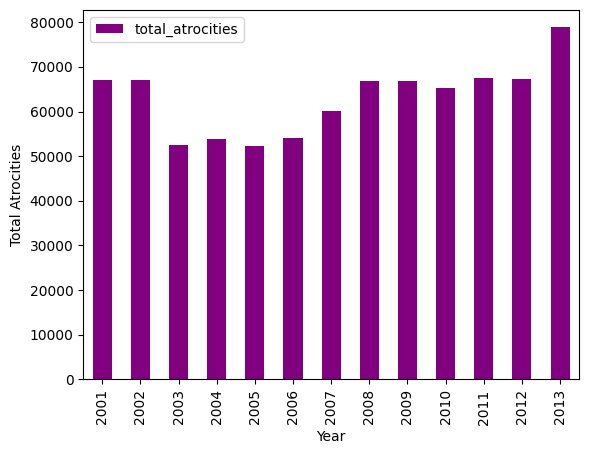

In [135]:
crime_trend = df.groupby('year')['total_atrocities'].sum().reset_index()
crime_trend.plot(x='year', y='total_atrocities', kind='bar', color='purple')
plt.xlabel('Year')
plt.ylabel('Total Atrocities')
plt.show()

In [136]:
caste_df = df.groupby('state/ut').agg({'other crimes against scs':'sum','total_atrocities':'sum'}).reset_index()
caste_df.head()

,state/ut,other crimes against scs,total_atrocities
0,a&n islands,0,0
1,andhra pradesh,38264,93378
2,arunachal pradesh,0,4
3,assam,644,1907
4,bihar,8966,80124


In [137]:
caste_df['caste_based_crime_percent'] = np.where(caste_df['total_atrocities'] == 0, 0, ((caste_df['other crimes against scs'] / caste_df['total_atrocities']) * 100).round(2))
caste_df.head()

,state/ut,other crimes against scs,total_atrocities,caste_based_crime_percent
0,a&n islands,0,0,0.00
1,andhra pradesh,38264,93378,40.98
2,arunachal pradesh,0,4,0.00
3,assam,644,1907,33.77
4,bihar,8966,80124,11.19


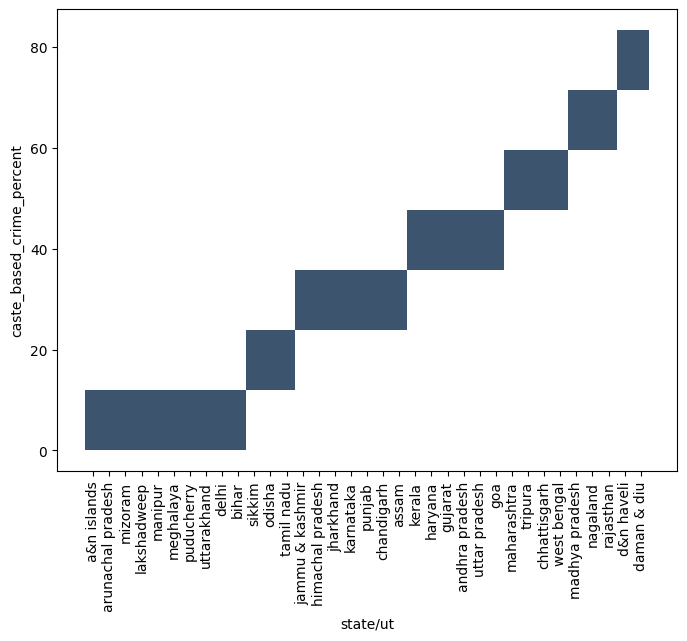

In [143]:
plt.figure(figsize=(8,6))
sns.histplot(data=caste_df.sort_values(by='caste_based_crime_percent'), x='state/ut', y='caste_based_crime_percent')
plt.xticks(rotation=90)
plt.show()

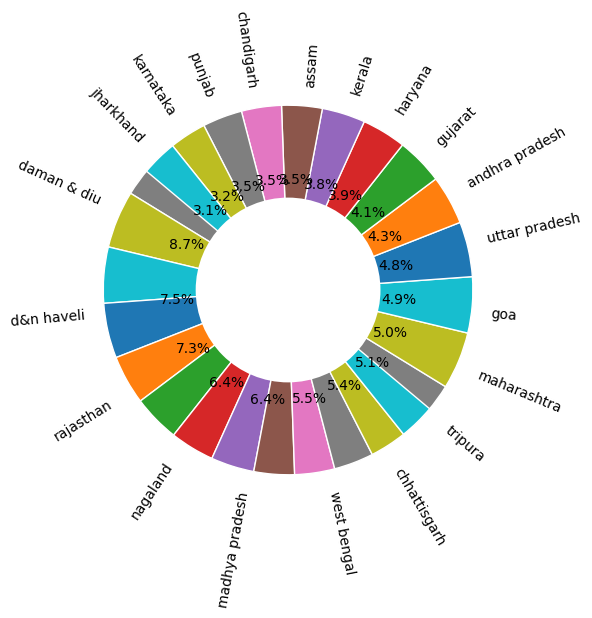

In [151]:
pie_df = caste_df.sort_values(by='caste_based_crime_percent', ascending=False).head(20)
plt.figure(figsize=(10,6))
plt.pie(
    pie_df['caste_based_crime_percent'],
    labels=pie_df['state/ut'], 
    rotatelabels=True,
    autopct='%1.1f%%',  # Display percentage values
    startangle=140,  # Rotate the chart for better visualization
    wedgeprops={'width':2,'edgecolor': 'white'}  # Add border to wedges for clarity
)
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.show()

In [152]:
caste_df2 = df.groupby(['state/ut','district']).agg({'other crimes against scs':'sum','total_atrocities':'sum'}).reset_index()
caste_df2.head()

,state/ut,district,other crimes against scs,total_atrocities
0,a&n islands,a and n islands,0,0
1,a&n islands,andaman,0,0
2,a&n islands,car,0,0
3,a&n islands,nicobar,0,0
4,a&n islands,north,0,0


In [153]:
caste_df2['caste_based_crime_percent'] = np.where(caste_df2['total_atrocities'] == 0, 0, ((caste_df2['other crimes against scs'] / caste_df2['total_atrocities']) * 100).round(2))
caste_df2.head()

,state/ut,district,other crimes against scs,total_atrocities,caste_based_crime_percent
0,a&n islands,a and n islands,0,0,0.0
1,a&n islands,andaman,0,0,0.0
2,a&n islands,car,0,0,0.0
3,a&n islands,nicobar,0,0,0.0
4,a&n islands,north,0,0,0.0


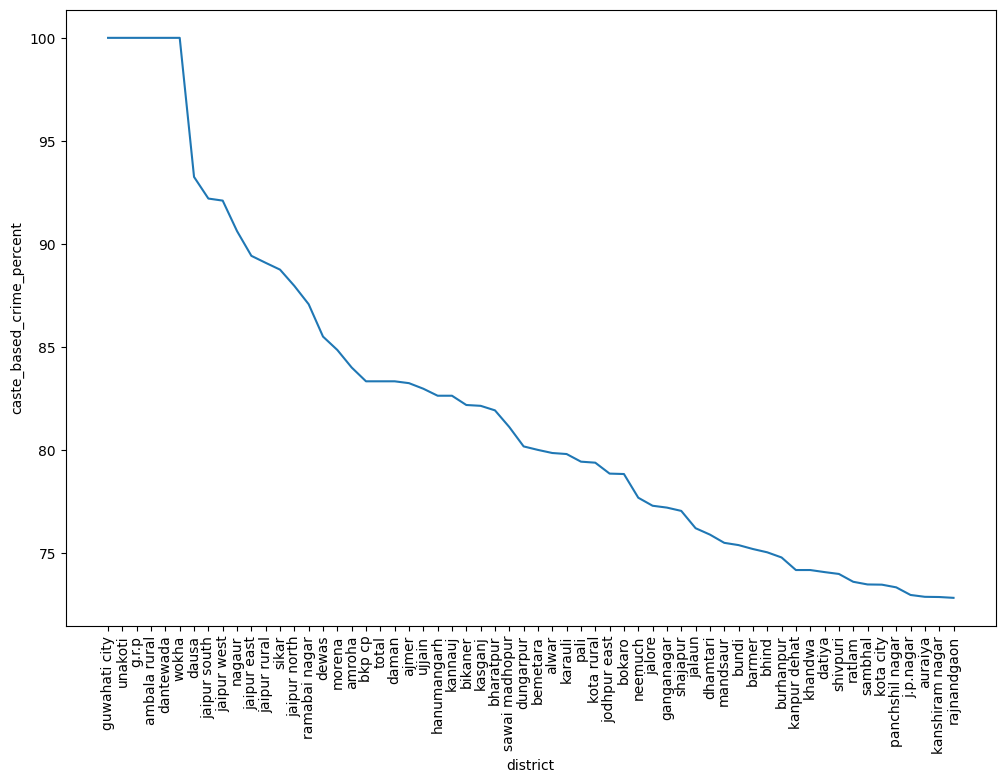

In [160]:
plt.figure(figsize=(12,8))

sns.lineplot(data=caste_df2.sort_values(by='caste_based_crime_percent', ascending=False)[:60], x='district', y='caste_based_crime_percent')
plt.xticks(rotation=90)
plt.show()

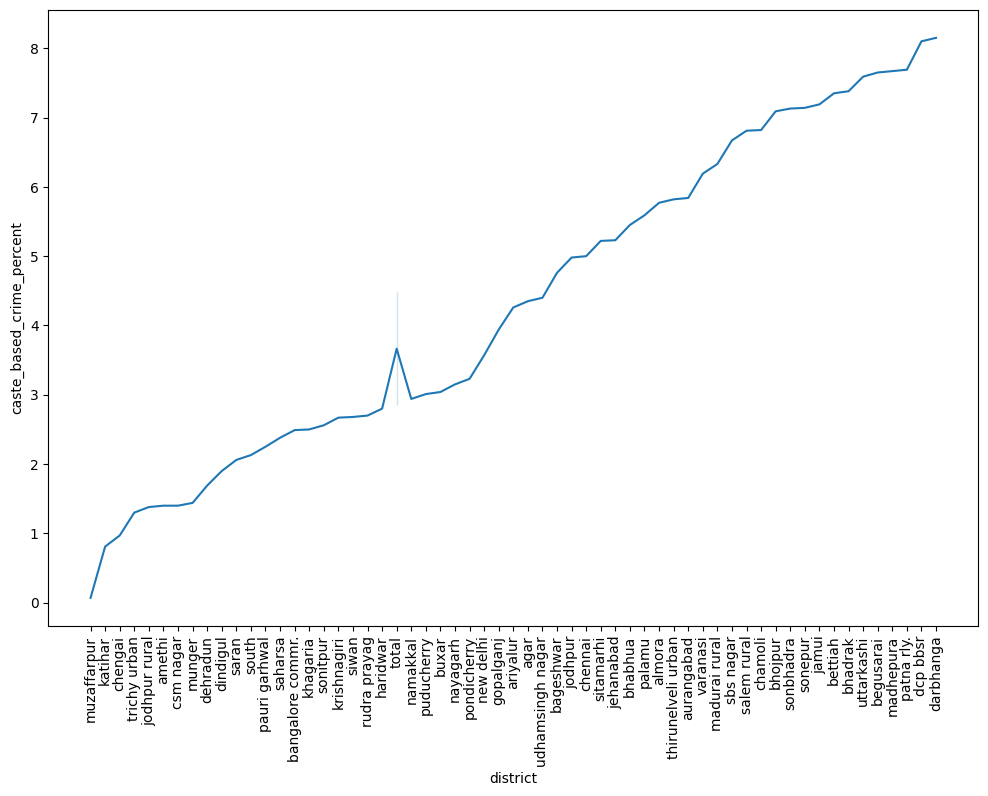

In [162]:
plt.figure(figsize=(12,8))
sns.lineplot(data=caste_df2[caste_df2['caste_based_crime_percent']>0].sort_values(by='caste_based_crime_percent')[:60], x='district', y='caste_based_crime_percent')
plt.xticks(rotation=90)
plt.show()